## Plot initital date of GLOW-S measurements for different regions across the world

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Load the GLOW-S width with snow affected values removed 
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/allRegion_large_T273check_over60.parquet'
final_large_data_warm_over60 = pd.read_parquet(output_path)

final_large_data_warm_over60 = final_large_data_warm_over60[final_large_data_warm_over60['width']>10]

In [18]:
final_large_data_warm_over60['COMID'].unique().shape

(476232,)

In [4]:
final_large_data_warm_over60['date'] = pd.to_datetime(final_large_data_warm_over60['date'])

In [5]:
earliest_df = final_large_data_warm_over60.loc[final_large_data_warm_over60.groupby('COMID')['date'].idxmin()]

In [6]:
earliest_df

,riverID,date,width,lat,lon,sceneID_unique,COMID,month,date_YMD,hot_enough
841155406,R11000054XS0000001,2017-04-06 04:25:24,284.632214,29.653813,32.352854,99058,11000054,4,2017-04-06,1.0
841156144,R11000302XS0000030,2017-04-03 06:56:02,13.679851,28.233937,33.165229,99056,11000302,4,2017-04-03,1.0
841157854,R11000308XS0000112,2017-04-03 02:54:47,12.599327,28.265051,33.092449,99054,11000308,4,2017-04-03,1.0
841158731,R11000309XS0000119,2017-04-03 06:56:02,124.806469,28.229661,33.167839,99056,11000309,4,2017-04-03,1.0
841161633,R11000766XS0000480,2018-05-28 10:08:15,157.703298,25.532500,34.638598,99106,11000766,5,2018-05-28,1.0
...,...,...,...,...,...,...,...,...,...,...
841140459,R86007242XS4702415,2019-06-28 22:31:22,15.566146,74.709918,-82.304249,19007,86007242,6,2019-06-28,1.0
841140979,R86007254XS4702419,2019-06-28 22:31:22,94.717595,74.714416,-82.239751,19007,86007254,6,2019-06-28,1.0
841145256,R86007258XS4702582,2019-06-06 22:59:11,90.563411,74.691651,-83.697484,18616,86007258,6,2019-06-06,1.0
841152113,R86007267XS4702660,2019-06-13 23:53:33,22.666807,74.499250,-113.620917,5005,86007267,6,2019-06-13,1.0


In [7]:
# Create a column containing the month number from since 1 Jan 2017

# Define the reference date
ref_date = pd.Timestamp('2017-01-01')

earliest_df['months_since_2017'] = (earliest_df['date'].dt.year - ref_date.year) * 12 + (earliest_df['date'].dt.month - ref_date.month) + 1

In [8]:
def classify_month(row):
    low = 4*((row['months_since_2017']-1)//4) + 1
    up = 4*((row['months_since_2017']-1)//4) + 4
    return '{} - {}'.format(low, up)

# Seasonality classification
earliest_df['month_class'] = earliest_df.apply(lambda row: classify_month(row), axis=1)

In [9]:
earliest_df

,riverID,date,width,lat,lon,sceneID_unique,COMID,month,date_YMD,hot_enough,months_since_2017,month_class
841155406,R11000054XS0000001,2017-04-06 04:25:24,284.632214,29.653813,32.352854,99058,11000054,4,2017-04-06,1.0,4,1 - 4
841156144,R11000302XS0000030,2017-04-03 06:56:02,13.679851,28.233937,33.165229,99056,11000302,4,2017-04-03,1.0,4,1 - 4
841157854,R11000308XS0000112,2017-04-03 02:54:47,12.599327,28.265051,33.092449,99054,11000308,4,2017-04-03,1.0,4,1 - 4
841158731,R11000309XS0000119,2017-04-03 06:56:02,124.806469,28.229661,33.167839,99056,11000309,4,2017-04-03,1.0,4,1 - 4
841161633,R11000766XS0000480,2018-05-28 10:08:15,157.703298,25.532500,34.638598,99106,11000766,5,2018-05-28,1.0,17,17 - 20
...,...,...,...,...,...,...,...,...,...,...,...,...
841140459,R86007242XS4702415,2019-06-28 22:31:22,15.566146,74.709918,-82.304249,19007,86007242,6,2019-06-28,1.0,30,29 - 32
841140979,R86007254XS4702419,2019-06-28 22:31:22,94.717595,74.714416,-82.239751,19007,86007254,6,2019-06-28,1.0,30,29 - 32
841145256,R86007258XS4702582,2019-06-06 22:59:11,90.563411,74.691651,-83.697484,18616,86007258,6,2019-06-06,1.0,30,29 - 32
841152113,R86007267XS4702660,2019-06-13 23:53:33,22.666807,74.499250,-113.620917,5005,86007267,6,2019-06-13,1.0,30,29 - 32


In [ ]:
world_subcatchments = gpd.read_file("/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/WorldSubcatchments/hybas_world_lev05_v1c.shp")
world_subcatchments = world_subcatchments.drop(columns=['path'])

base_dir = "/N/lustre/project/proj-212/Dongmei/MERIT_Hydro/"
shapefiles = [f"riv_pfaf_{i}_MERIT_Hydro_v07_Basins_v01.shp" for i in range(1, 9)]
merged_line_gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(os.path.join(base_dir, shp)) for shp in shapefiles], ignore_index=True))

merged_line_gdf['COMID'] = merged_line_gdf['COMID'].astype(int)
earliest_gdf = merged_line_gdf.merge(earliest_df, on='COMID', how='inner')
earliest_gdf = earliest_gdf.set_geometry('geometry')
earliest_gdf = earliest_gdf.set_crs(epsg=4326)

In [47]:
# Perform a spatial join to associate points with polygons
joined_gdf = gpd.sjoin(earliest_gdf, world_subcatchments, how="inner", predicate="intersects")

# Group by the polygon index and calculate the mode of the sin_season column
mode_data = joined_gdf.groupby('index_right')['month_class'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No Data')

# Count the number of points falling within each polygon
point_counts = joined_gdf.groupby('index_right').size()

# Add the mode and point count as new columns to the world_subcatchments GeoDataFrame
world_subcatchments['month_class'] = world_subcatchments.index.map(mode_data)
world_subcatchments['point_count'] = world_subcatchments.index.map(point_counts)

# Handle cases where no points fall within a polygon (NaN values)
world_subcatchments['month_class'] = world_subcatchments['month_class'].fillna('No Data')
world_subcatchments['point_count'] = world_subcatchments['point_count'].fillna(0)

# Calculate Area_by_point with a conditional check for point_count 
world_subcatchments['Area_by_point'] = np.where(
    world_subcatchments['point_count'] == 0,  # Condition: point_count is 0
    0,  # Value if condition is true
    world_subcatchments['SUB_AREA'] / world_subcatchments['point_count']  # Value if condition is false
)

world_subcatchments.loc[world_subcatchments['Area_by_point'] >= 1000, 'month_class'] = 'No Data'

In [13]:
world_subcatchments['month_class'].unique()

array(['No Data', '21 - 24', '25 - 28', '17 - 20', '5 - 8', '1 - 4',
       '33 - 36', '29 - 32', '37 - 40'], dtype=object)

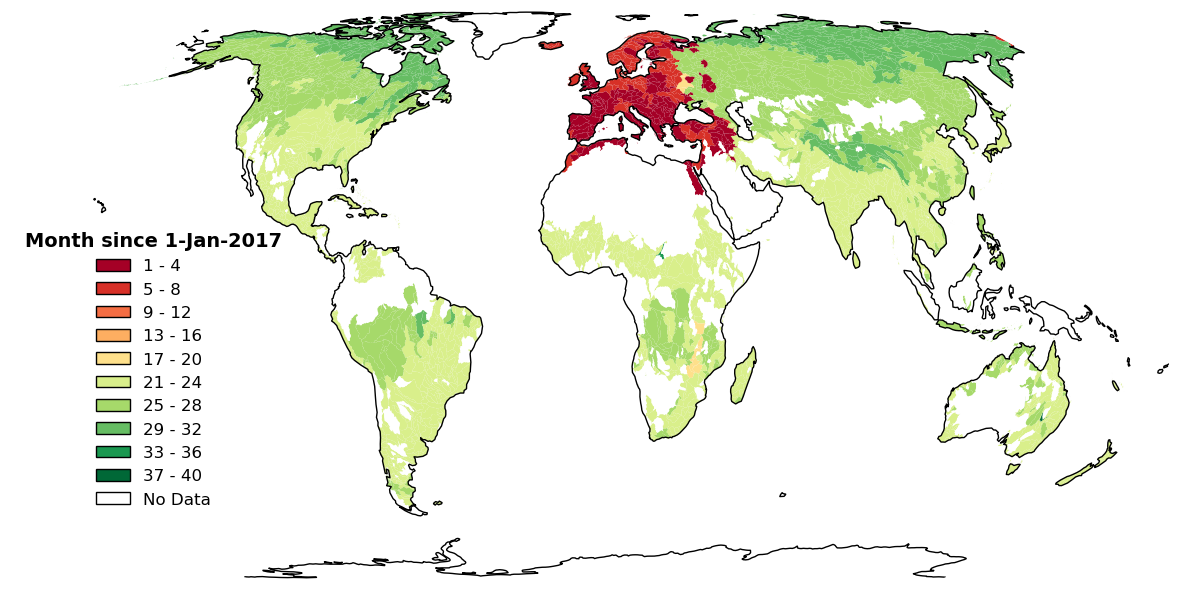

In [17]:
import matplotlib.patches as mpatches

gdf = gpd.read_file('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/TempShapefiles/random1000pt4robinson.gpkg')

plt.rcParams['font.family'] = 'sans-serif'

# Define a milder color map for the sin_season_mode categories
bold_color_map = {
    '1 - 4': '#a50026',     # dark red
    '5 - 8': '#d73027',     # red
    '9 - 12': '#f46d43',    # orange-red
    '13 - 16': '#fdae61',   # orange
    '17 - 20': '#fee08b',   # yellow
    '21 - 24': '#d9ef8b',   # yellow-green
    '25 - 28': '#a6d96a',   # light green
    '29 - 32': '#66bd63',   # green
    '33 - 36': '#1a9850',   # dark green
    '37 - 40': '#006837',   # forest green
    'No Data': '#FFFFFF'
}

# Assuming 'world_subcatchments' is a GeoDataFrame that includes geometries and 'sin_season_mode'
world_subcatchments['color'] = world_subcatchments['month_class'].map(bold_color_map)

# Create figure and axis with an "Equal Earth" projection (similar to Peterson)
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.EqualEarth()})

# Plot the world_subcatchments GeoDataFrame colored by sin_season_mode
world_subcatchments.plot(color=world_subcatchments['color'], ax=ax, linewidth=0.5, edgecolor=None, alpha=1, transform=ccrs.PlateCarree())

# Set title and labels with larger font sizes
# ax.set_title('Subbasins by Seasonality Classes', fontsize=24, pad=20)  # Larger title font, added pad for space

# Increase the font size of tick labels (axes labels)
ax.tick_params(labelsize=14)

# Plot the gdf with larger marker size and transparency
gdf.plot(ax=ax, marker='o', color='black', markersize=10, alpha=1, transform=ccrs.PlateCarree())

# Remove the gridlines and labels but keep the overall boundary
ax.set_global()
ax.coastlines()
ax.set_frame_on(False)

# Create a custom legend with milder colors, larger text, and a black box around each color
legend_patches = [
    mpatches.Patch(facecolor=color, label=label, edgecolor='black', linewidth=1)  # Add black edge to each patch
    for label, color in bold_color_map.items()
]
ax.legend(
    handles=legend_patches, 
    fontsize=12, 
    loc='lower left', 
    bbox_to_anchor=(0.00, 0.10), 
    frameon=False,
    title = 'Month since 1-Jan-2017',
    title_fontproperties={'weight': 'bold', 'size': 14}
)

# Add space between elements
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin to add space between title and plot

# Show the plot
plt.savefig('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures/plot_initial_month.tiff', dpi=600)
plt.show()